In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
df = pd.read_csv("german_credit_data.csv", index_col=0)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [159]:
# Check Null value present or not in dataset

df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [160]:
# Check which columns those are Categorical value

categorical_features = df.select_dtypes(include=[np.object]).columns
df[categorical_features]

<ipython-input-160-6db778ff8270>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object]).columns


,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
0,male,own,NaN,little,radio/TV,good
1,female,own,little,moderate,radio/TV,bad
2,male,own,little,NaN,education,good
3,male,free,little,little,furniture/equipment,good
4,male,free,little,little,car,bad
...,...,...,...,...,...,...
995,female,own,little,NaN,furniture/equipment,good
996,male,own,little,little,car,good
997,male,own,little,NaN,radio/TV,good
998,male,free,little,little,radio/TV,bad


In [161]:
# Convert Categorical columns to Numerical value using LabelEncoder

# Here , Housing , Saving accounts , Checking account are the ordered value (Ordinal Value) 

# Attributes "" Saving accounts , Checking account " those value convert to Numerical value 

def SavingChecking_LabelEncoder(value):
    if value == "little":
        return 1
    elif value == "moderate":
        return 2
    elif value == "quite rich":
        return 3
    elif value == "rich":
        return 4
    else:
        return 0

In [162]:
df["Saving accounts"] = df["Saving accounts"].apply(SavingChecking_LabelEncoder)
df["Checking account"] = df["Checking account"].apply(SavingChecking_LabelEncoder)

In [163]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,0,1,1169,6,radio/TV,good
1,22,female,2,own,1,2,5951,48,radio/TV,bad
2,49,male,1,own,1,0,2096,12,education,good
3,45,male,2,free,1,1,7882,42,furniture/equipment,good
4,53,male,2,free,1,1,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,1,0,1736,12,furniture/equipment,good
996,40,male,3,own,1,1,3857,30,car,good
997,38,male,2,own,1,0,804,12,radio/TV,good
998,23,male,2,free,1,1,1845,45,radio/TV,bad


In [164]:
# Convert to Numerical Value

def House_LabelEncoder(value):
    if value == "free":
        return 0
    elif value == "rent":
        return 1
    elif value == "own":
        return 2

In [165]:
df["Housing"] = df["Housing"].apply(House_LabelEncoder)

In [166]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,2,0,1,1169,6,radio/TV,good
1,22,female,2,2,1,2,5951,48,radio/TV,bad
2,49,male,1,2,1,0,2096,12,education,good
3,45,male,2,0,1,1,7882,42,furniture/equipment,good
4,53,male,2,0,1,1,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,2,1,0,1736,12,furniture/equipment,good
996,40,male,3,2,1,1,3857,30,car,good
997,38,male,2,2,1,0,804,12,radio/TV,good
998,23,male,2,0,1,1,1845,45,radio/TV,bad


<ipython-input-167-0620cdc0436f>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\


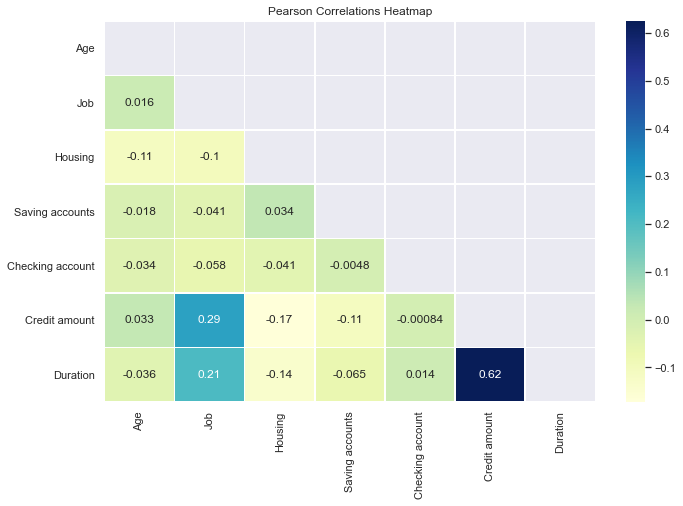

In [167]:
corr = df[['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

In [168]:
# Data Pre-processing For Discrete Categorical Columns (Sex,Purpose,Risk)

from sklearn.preprocessing import LabelEncoder
for col in ["Sex", "Purpose", "Risk"]:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [169]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,2,0,1,1169,6,5,1
1,22,0,2,2,1,2,5951,48,5,0
2,49,1,1,2,1,0,2096,12,3,1
3,45,1,2,0,1,1,7882,42,4,1
4,53,1,2,0,1,1,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,2,1,0,1736,12,4,1
996,40,1,3,2,1,1,3857,30,1,1
997,38,1,2,2,1,0,804,12,5,1
998,23,1,2,0,1,1,1845,45,5,0


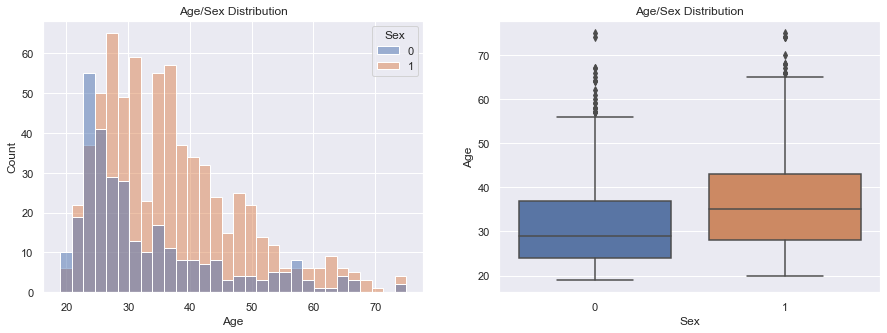

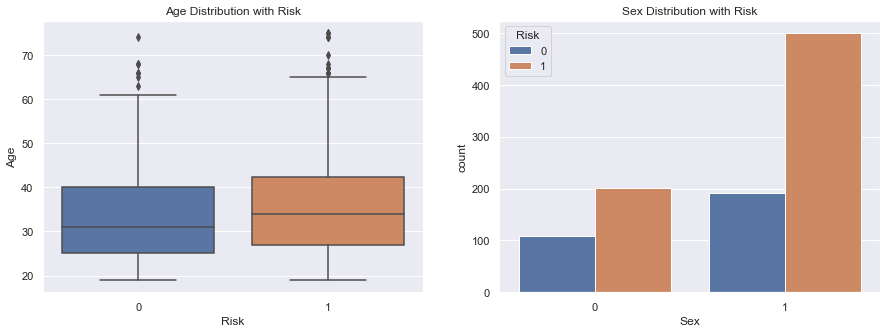

In [170]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Age', bins=30, hue="Sex", ax=ax[0]).set_title("Age/Sex Distribution");
sns.boxplot(data=df, x="Sex", y="Age", ax=ax[1]).set_title("Age/Sex Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Age', ax=ax[0]).set_title("Age Distribution with Risk");
sns.countplot(data=df, x="Sex", hue="Risk", ax=ax[1]).set_title("Sex Distribution with Risk");

##### Age does not affect the risk rating much
Males take more count of credit from Bank

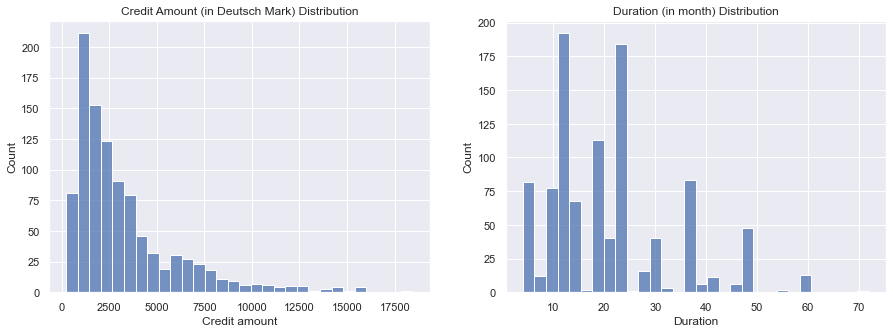

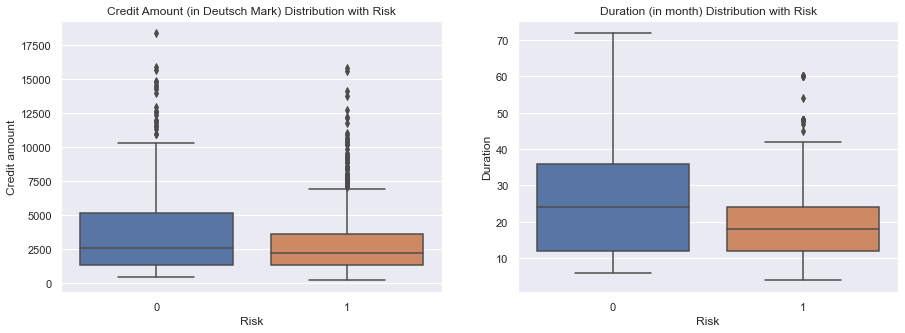

In [171]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Credit amount', bins=30, ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution");
sns.histplot(df, x='Duration', bins=30, ax=ax[1]).set_title("Duration (in month) Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Credit amount', ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution with Risk");
sns.boxplot(data=df, x='Risk', y='Duration', ax=ax[1]).set_title("Duration (in month) Distribution with Risk");

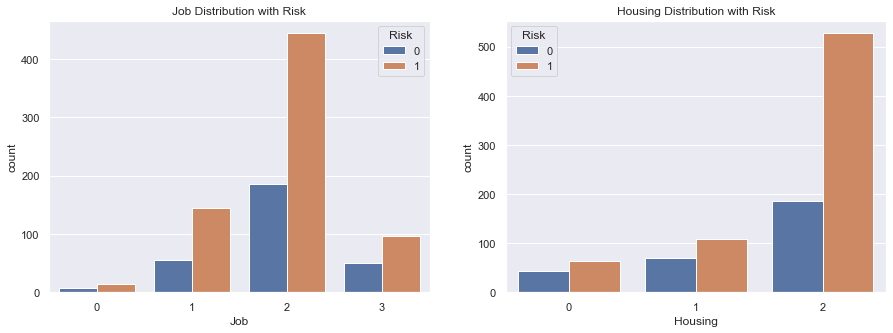

In [172]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x="Job", hue="Risk", ax=ax[0]).set_title("Job Distribution with Risk");
sns.countplot(data=df, x="Housing", hue="Risk", ax=ax[1]).set_title("Housing Distribution with Risk");

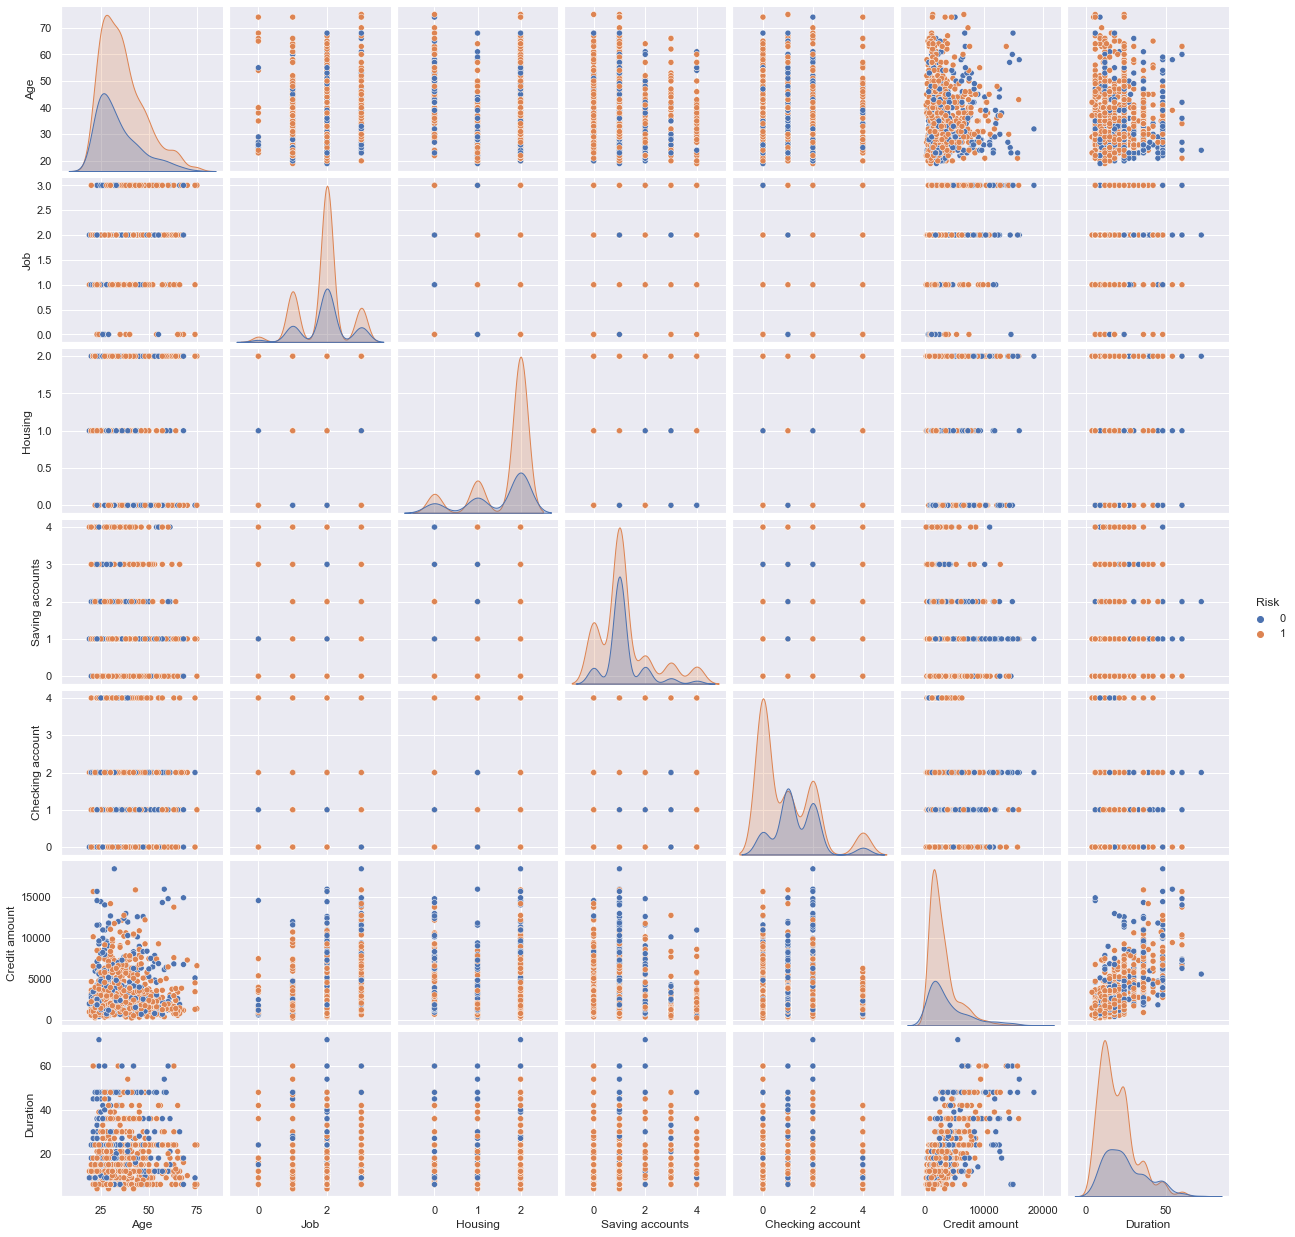

In [173]:
sns.pairplot(df[['Age', 'Job', 'Housing', 'Saving accounts','Checking account', 'Credit amount', 'Duration', "Risk"]], hue="Risk");

In [174]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,2,0,1,1169,6,5,1
1,22,0,2,2,1,2,5951,48,5,0
2,49,1,1,2,1,0,2096,12,3,1
3,45,1,2,0,1,1,7882,42,4,1
4,53,1,2,0,1,1,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,2,1,0,1736,12,4,1
996,40,1,3,2,1,1,3857,30,1,1
997,38,1,2,2,1,0,804,12,5,1
998,23,1,2,0,1,1,1845,45,5,0


In [220]:
from sklearn.model_selection import train_test_split

X = df.drop(['Risk'],axis='columns')
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [221]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINING RESULTS: \n")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [222]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=10, random_state=0)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 

CONFUSION MATRIX:
[[201   8]
 [  6 485]]
ACCURACY SCORE:
0.9800
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.971014    0.983773      0.98    0.977394      0.979964
recall       0.961722    0.987780      0.98    0.974751      0.980000
f1-score     0.966346    0.985772      0.98    0.976059      0.979972
support    209.000000  491.000000      0.98  700.000000    700.000000
TESTING RESULTS: 

CONFUSION MATRIX:
[[ 42  49]
 [ 41 168]]
ACCURACY SCORE:
0.7000
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.506024    0.774194       0.7    0.640109      0.692849
recall      0.461538    0.803828       0.7    0.632683      0.700000
f1-score    0.482759    0.788732       0.7    0.635746      0.695920
support    91.000000  209.000000       0.7  300.000000    300.000000


In [223]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba1 = bagging_clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, bagging_clf.predict_proba(X_test)[:,1],average='macro')

0.6883116883116882

No handles with labels found to put in legend.


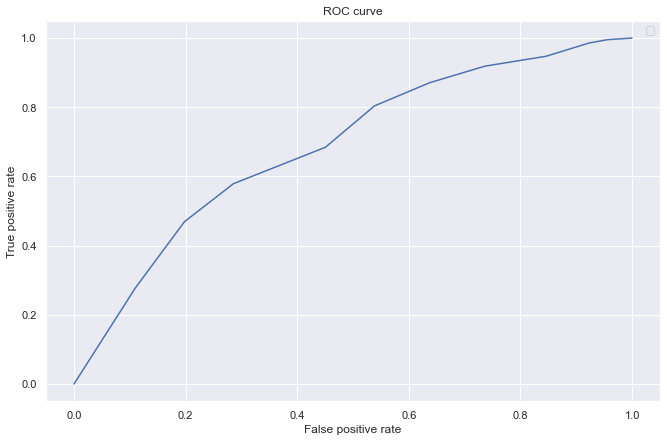

In [225]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba1)
plt.plot(fpr, tpr)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()   

In [227]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0, n_estimators=100)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 

CONFUSION MATRIX:
[[209   0]
 [  0 491]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    209.0  491.0       1.0      700.0         700.0
TESTING RESULTS: 

CONFUSION MATRIX:
[[ 33  58]
 [ 20 189]]
ACCURACY SCORE:
0.7400
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.622642    0.765182      0.74    0.693912      0.721945
recall      0.362637    0.904306      0.74    0.633472      0.740000
f1-score    0.458333    0.828947      0.74    0.643640      0.716528
support    91.000000  209.000000      0.74  300.000000    300.000000


In [228]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba2 = rf_clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1],average='macro')

0.7269572532730428

No handles with labels found to put in legend.


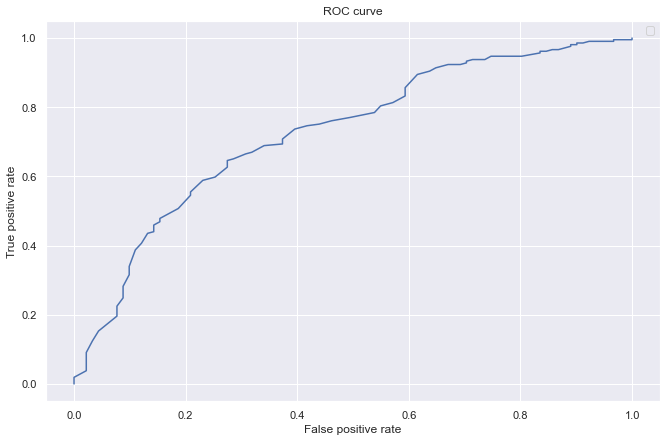

In [229]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba2)
plt.plot(fpr, tpr)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()   

In [230]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=100)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 

CONFUSION MATRIX:
[[107 102]
 [ 34 457]]
ACCURACY SCORE:
0.8057
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.758865    0.817531  0.805714    0.788198      0.800015
recall       0.511962    0.930754  0.805714    0.721358      0.805714
f1-score     0.611429    0.870476  0.805714    0.740952      0.793132
support    209.000000  491.000000  0.805714  700.000000    700.000000
TESTING RESULTS: 

CONFUSION MATRIX:
[[ 27  64]
 [ 26 183]]
ACCURACY SCORE:
0.7000
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.509434    0.740891       0.7    0.625162      0.670682
recall      0.296703    0.875598       0.7    0.586151      0.700000
f1-score    0.375000    0.802632       0.7    0.588816      0.672917
support    91.000000  209.000000       0.7  300.000000    300.000000


In [231]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba3 = ada_boost_clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, ada_boost_clf.predict_proba(X_test)[:,1],average='macro')

0.6668068773331932

No handles with labels found to put in legend.


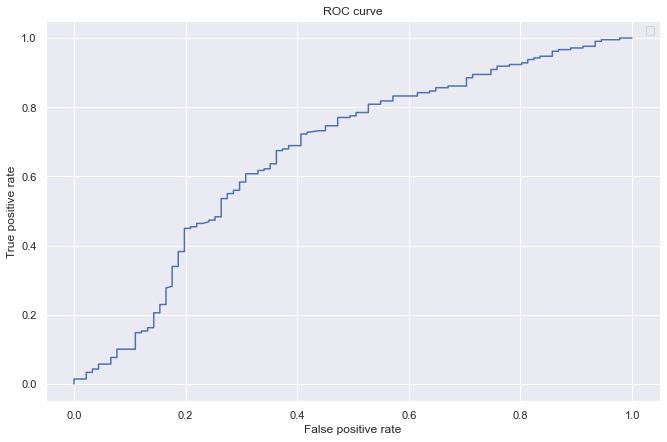

In [232]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba3)
plt.plot(fpr, tpr)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()   

In [233]:
from xgboost import XGBClassifier

grad_boost_clf = XGBClassifier(n_estimators=100)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

C:\Users\souvik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:38:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAINING RESULTS: 

CONFUSION MATRIX:
[[208   1]
 [  0 491]]
ACCURACY SCORE:
0.9986
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.997967  0.998571    0.998984      0.998574
recall       0.995215    1.000000  0.998571    0.997608      0.998571
f1-score     0.997602    0.998983  0.998571    0.998292      0.998570
support    209.000000  491.000000  0.998571  700.000000    700.000000
TESTING RESULTS: 

CONFUSION MATRIX:
[[ 45  46]
 [ 25 184]]
ACCURACY SCORE:
0.7633
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.642857    0.800000  0.763333    0.721429      0.752333
recall    

In [234]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba4 = grad_boost_clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, grad_boost_clf.predict_proba(X_test)[:,1],average='macro')

0.7337925232662075

No handles with labels found to put in legend.


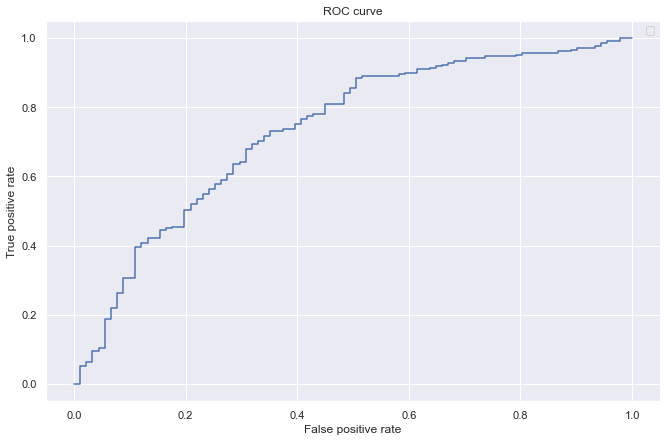

In [235]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba4)
plt.plot(fpr, tpr)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()  